In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('input_data/train.csv')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52'],
      dtype='object')

In [6]:
n_unique = [X[col].nunique() for col in X.columns]
n_unique

[500,
 500,
 500,
 500,
 500,
 500,
 199,
 90000,
 2,
 500,
 500,
 500,
 500,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000]

In [7]:
threshold = 1000
categorical_columns = [col for col in X.columns if X[col].nunique() < threshold]
categorical_columns

['0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12']

In [8]:
[X[col].describe() for col in categorical_columns]

[count    90000.000000
 mean       249.423944
 std        144.336393
 min          0.000000
 25%        125.000000
 50%        250.000000
 75%        374.000000
 max        499.000000
 Name: 0, dtype: float64,
 count    90000.000000
 mean       250.236267
 std        144.022200
 min          0.000000
 25%        126.000000
 50%        251.000000
 75%        375.000000
 max        499.000000
 Name: 1, dtype: float64,
 count    90000.000000
 mean       248.637289
 std        144.107577
 min          0.000000
 25%        124.000000
 50%        248.000000
 75%        374.000000
 max        499.000000
 Name: 2, dtype: float64,
 count    90000.000000
 mean       249.736600
 std        144.284945
 min          0.000000
 25%        125.000000
 50%        250.000000
 75%        375.000000
 max        499.000000
 Name: 3, dtype: float64,
 count    90000.000000
 mean       249.436178
 std        143.941581
 min          0.000000
 25%        125.000000
 50%        250.000000
 75%        373.000000

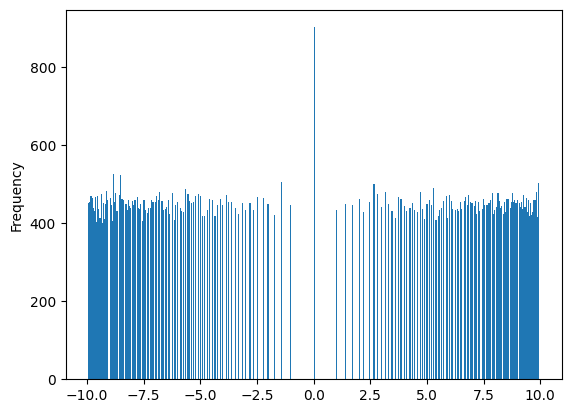

In [9]:
X['6'].plot.hist(bins=400)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['53'] = label_encoder.fit_transform(X['6'])

In [11]:
categorical_columns.remove('6')
categorical_columns.append('53')
categorical_columns

['0', '1', '2', '3', '4', '5', '8', '9', '10', '11', '12', '53']

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
feature_importances

array([3.05449165e-10, 2.88641742e-10, 2.88683390e-10, 2.75017444e-10,
       2.82946765e-10, 2.97319263e-10, 1.09517234e-01, 9.95547098e-05,
       7.74614723e-15, 2.97489909e-10, 2.75549255e-10, 2.94214182e-10,
       3.41817728e-10, 2.71549600e-10, 2.66252476e-10, 3.24019767e-10,
       2.89007325e-10, 3.24795630e-10, 2.46104109e-10, 2.53820814e-10,
       3.60124882e-10, 3.43676664e-10, 2.78337747e-10, 2.40871034e-10,
       3.12792545e-10, 3.40006591e-10, 3.35064695e-10, 3.17719193e-10,
       3.22979406e-10, 2.99804163e-10, 2.90322026e-10, 2.97307960e-10,
       2.69328207e-10, 3.27465698e-10, 3.05401428e-10, 3.27870697e-10,
       3.14361849e-10, 2.90487614e-10, 2.94124296e-10, 3.21209334e-10,
       2.57133575e-10, 3.15447700e-10, 3.32596616e-10, 2.98851221e-10,
       2.76606222e-10, 2.62730437e-10, 3.04621836e-10, 3.04187197e-10,
       2.70215375e-10, 2.78755965e-10, 2.99358342e-10, 3.12595734e-10,
       2.95407863e-10, 8.90383196e-01])

In [13]:
features = ['6', '7']
X_part = X[features]

In [14]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
X_train, X_val, y_train, y_val = train_test_split(X_part, y, test_size=0.1, random_state=12)
reg = RandomForestRegressor()
res = cross_val_score(reg, X_part, y, cv=5, scoring='neg_root_mean_squared_error')
res

array([-0.00158567, -0.00158853, -0.00155863, -0.00158472, -0.00159064])

In [15]:
features = ['6', '7']
X_part = X[features]

In [32]:
poly_f.shape

(90000, 6)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(2)
poly_f = poly.fit_transform(X_part)
poly_cols = poly.get_feature_names_out()
X_poly = pd.DataFrame(poly_f, columns=poly_cols)
reg = LinearRegression()
res = cross_val_score(reg, X_poly, y, cv=5, scoring='neg_root_mean_squared_error')
res

array([-2.60921914e-14, -3.37500384e-14, -1.36729394e-14, -2.03885518e-14,
       -3.01663369e-14])

In [55]:
res = reg.fit(X_poly, y)

In [56]:
res.coef_

array([ 0.00000000e+00,  6.66133815e-16,  1.00000000e+00,  1.00000000e+00,
       -1.40512602e-16,  1.55934293e-14])

In [57]:
poly_cols

array(['1', '6', '7', '6^2', '6 7', '7^2'], dtype=object)

In [44]:
res = X['7'] + X['6']**2

In [47]:
(res - y).abs().max()

5.684341886080802e-14

In [49]:
X_test = pd.read_csv('input_data/hidden_test.csv')

In [50]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,221,246,314,406,464,317,6.708204,0.436684,1,205,...,1.272356,12.306512,7.778209,5.698493,10.023215,4.959409,4.056025,4.642375,4.533745,6.754558
9996,152,157,32,133,369,261,5.656854,0.986208,1,457,...,2.331195,13.176561,6.697370,4.119232,2.190155,14.555999,7.786794,9.414130,5.413161,4.134093
9997,349,240,355,97,93,176,4.690416,0.830543,1,287,...,14.423037,0.941523,3.555292,12.572057,7.058367,12.999451,1.901825,5.100031,1.498432,8.093801
9998,427,70,63,265,62,150,4.000000,0.502337,1,124,...,1.154640,1.593796,9.902159,2.548667,11.339210,14.192310,14.142207,9.966924,8.538981,7.036367


In [52]:
res = X_test['7'] + X_test['6']**2
res

0       11.218760
1       79.700228
2        7.494556
3       38.511117
4       64.756416
          ...    
9995    45.436684
9996    32.986208
9997    22.830543
9998    16.502337
9999    91.986542
Length: 10000, dtype: float64